In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm

In [5]:
url = 'https://raw.githubusercontent.com/lorey/list-of-countries/master/csv/countries.csv'

In [6]:
df = pd.read_csv(url, sep=";")

In [7]:
print(df.head(5))

  alpha_2 alpha_3      area           capital continent currency_code  \
0      AD     AND     468.0  Andorra la Vella        EU           EUR   
1      AE     ARE   82880.0         Abu Dhabi        AS           AED   
2      AF     AFG  647500.0             Kabul        AS           AFN   
3      AG     ATG     443.0        St. John's       NaN           XCD   
4      AI     AIA     102.0        The Valley       NaN           XCD   

  currency_name eqivalent_fips_code fips  geoname_id          languages  \
0          Euro                 NaN   AN     3041565                 ca   
1        Dirham                 NaN   AE      290557  ar-AE,fa,en,hi,ur   
2       Afghani                 NaN   AF     1149361  fa-AF,ps,uz-AF,tk   
3        Dollar                 NaN   AC     3576396              en-AG   
4        Dollar                 NaN   AV     3573511              en-AI   

                   name         neighbours  numeric   phone  population  \
0               Andorra            

In [8]:
print('Cantidad de Filas y columnas:',df.shape)

Cantidad de Filas y columnas: (252, 19)


In [9]:
print('Nombre de columnas:',df.columns)

Nombre de columnas: Index(['alpha_2', 'alpha_3', 'area', 'capital', 'continent', 'currency_code',
       'currency_name', 'eqivalent_fips_code', 'fips', 'geoname_id',
       'languages', 'name', 'neighbours', 'numeric', 'phone', 'population',
       'postal_code_format', 'postal_code_regex', 'tld'],
      dtype='object')


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 252 entries, 0 to 251
Data columns (total 19 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   alpha_2              251 non-null    object 
 1   alpha_3              252 non-null    object 
 2   area                 252 non-null    float64
 3   capital              246 non-null    object 
 4   continent            210 non-null    object 
 5   currency_code        251 non-null    object 
 6   currency_name        251 non-null    object 
 7   eqivalent_fips_code  1 non-null      object 
 8   fips                 249 non-null    object 
 9   geoname_id           252 non-null    int64  
 10  languages            249 non-null    object 
 11  name                 252 non-null    object 
 12  neighbours           165 non-null    object 
 13  numeric              252 non-null    int64  
 14  phone                247 non-null    object 
 15  population           252 non-null    int

In [11]:
df.describe()

,area,geoname_id,numeric,population
count,2.520000e+02,2.520000e+02,252.000000,2.520000e+02
mean,5.952879e+05,2.427870e+06,434.309524,2.727679e+07
std,1.904818e+06,1.632093e+06,254.663139,1.164127e+08
min,0.000000e+00,4.951800e+04,0.000000,0.000000e+00
25%,1.098000e+03,1.163774e+06,217.000000,1.879528e+05
50%,6.489450e+04,2.367967e+06,436.000000,4.268583e+06
75%,3.622245e+05,3.478296e+06,652.500000,1.536688e+07
max,1.710000e+07,8.505033e+06,894.000000,1.330044e+09


In [14]:
corr = df.set_index('alpha_3').select_dtypes(include='number').corr()

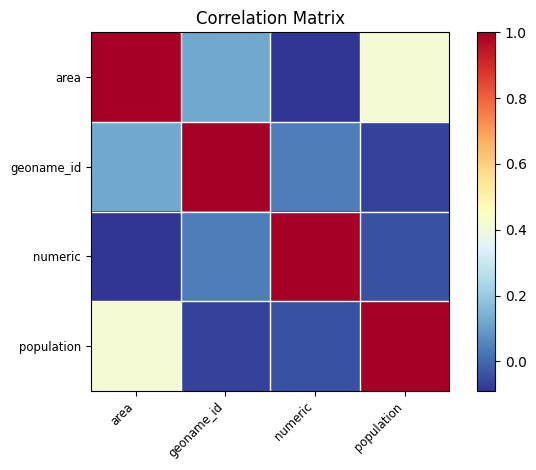

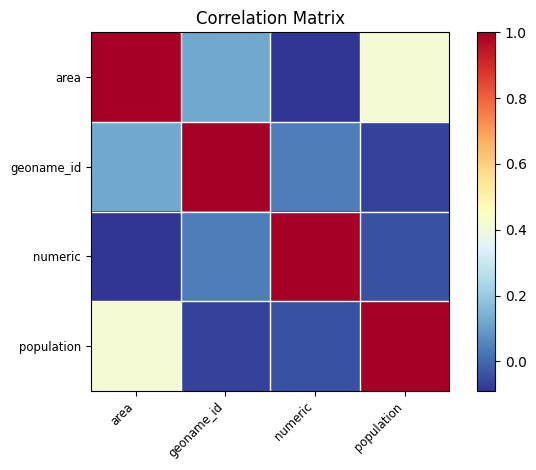

In [15]:
sm.graphics.plot_corr(corr,xnames=list(corr.columns))

In [16]:
plt.show()

In [19]:
url = 'https://raw.githubusercontent.com/DrueStaples/Population_Growth/master/countries.csv'

In [20]:
df_pop = pd.read_csv(url)

In [21]:
print(df_pop.head(5))

       country  year  population
0  Afghanistan  1952     8425333
1  Afghanistan  1957     9240934
2  Afghanistan  1962    10267083
3  Afghanistan  1967    11537966
4  Afghanistan  1972    13079460


In [22]:
df_pop_es = df_pop[df_pop["country"] == 'Spain']

In [23]:
print(df_pop_es.head())

     country  year  population
1416   Spain  1952    28549870
1417   Spain  1957    29841614
1418   Spain  1962    31158061
1419   Spain  1967    32850275
1420   Spain  1972    34513161


<Axes: >

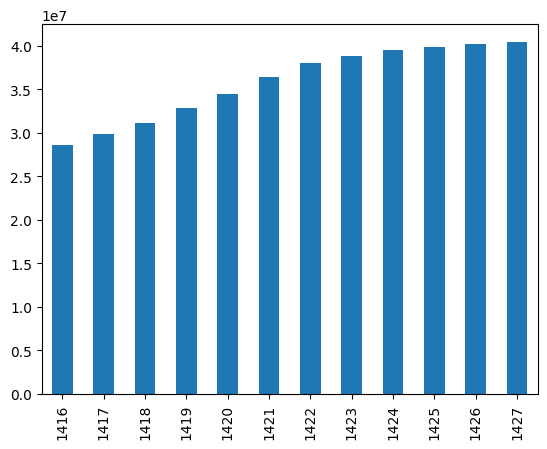

In [26]:
df_pop_es.drop(['country'],axis=1)['population'].plot(kind='bar')

In [27]:
df_pop_ar = df_pop[df_pop["country"] == 'Argentina']

In [28]:
anios = df_pop_es['year'].unique()

In [30]:
pop_ar = df_pop_ar['population'].values
pop_es = df_pop_es['population'].values

In [31]:
df_plot = pd.DataFrame({'Argentina': pop_ar, 'Spain':pop_es}, index=anios)

<Axes: >

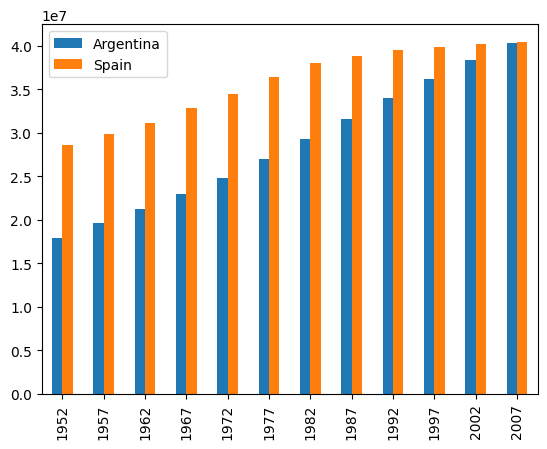

In [32]:
df_plot.plot(kind='bar')

In [34]:
df_espanol = df.replace(np.nan,regex=True)

In [35]:
df_espanol = df_espanol[df_espanol['languages'].str.contains('es')]
df_espanol

,alpha_2,alpha_3,area,capital,continent,currency_code,currency_name,eqivalent_fips_code,fips,geoname_id,languages,name,neighbours,numeric,phone,population,postal_code_format,postal_code_regex,tld
9,AR,ARG,2766890.0,Buenos Aires,SA,ARS,Peso,NaN,AR,3865483,"es-AR,en,it,de,fr,gn",Argentina,"CL,BO,UY,PY,BR",32,54,41343201,@####@@@,"^[A-Z]?\d{4}[A-Z]{0,3}$",.ar
13,AW,ABW,193.0,Oranjestad,OC,AWG,Guilder,NaN,AA,3577279,"nl-AW,es,en",Aruba,"CH,DE,HU,SK,CZ,IT,SI,LI",533,297,71566,####,^(\d{4})$,.aw
28,BO,BOL,1098580.0,Sucre,SA,BOB,Boliviano,FI,BL,3923057,"es-BO,qu,ay",Bolivia,"PE,CL,PY,BR,AR",68,591,9947418,@@####,^([A-Z]{2}\d{4})$,.bo
30,BR,BRA,8511965.0,Brasilia,SA,BRL,Real,FI,BR,3469034,"pt-BR,es,en,fr",Brazil,"SR,PE,BO,UY,GY,PY,GF,VE,CO,AR",76,55,201103330,#####-###,^\d{5}-\d{3}$,.br
36,BZ,BLZ,22966.0,Belmopan,EU,BZD,Dollar,FI,BH,3582678,"en-BZ,es",Belize,"GT,MX",84,501,314522,######,^(\d{6})$,.bz
45,CL,CHL,756950.0,Santiago,SA,CLP,Peso,FI,CI,3895114,es-CL,Chile,"PE,BO,AR",152,56,16746491,#######,^(\d{7})$,.cl
48,CO,COL,1138910.0,Bogota,SA,COP,Peso,FI,CO,3686110,es-CO,Colombia,"EC,PE,PA,BR,VE",170,57,47790000,######,^(\d{6})$,.co
49,CR,CRI,51100.0,San Jose,SA,CRC,Colon,FI,CS,3624060,"es-CR,en",Costa Rica,"PA,NI",188,506,4516220,####,^(\d{4})$,.cr
50,CU,CUB,110860.0,Havana,SA,CUP,Peso,FI,CU,3562981,es-CU,Cuba,US,192,53,11423000,CP #####,^(?:CP)*(\d{5})$,.cu
60,DO,DOM,48730.0,Santo Domingo,EU,DOP,Peso,FI,DR,3508796,es-DO,Dominican Republic,HT,214,+1-809 and 1-829,9823821,#####,^(\d{5})$,.do


<Axes: xlabel='alpha_3'>

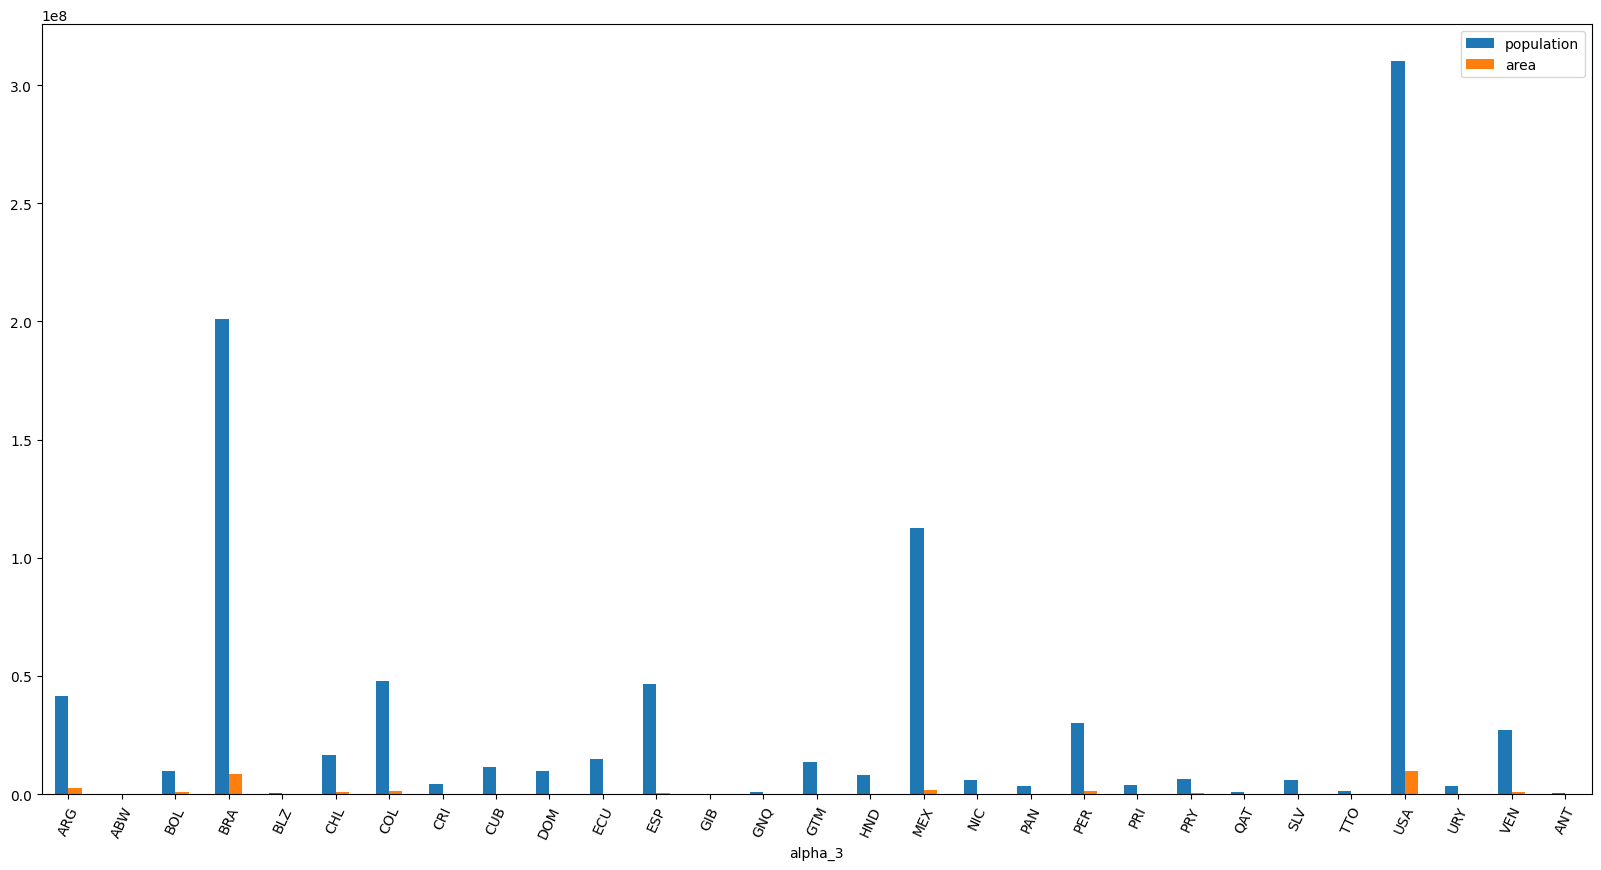

In [36]:
df_espanol.set_index('alpha_3')[['population','area']].plot(kind='bar',rot=65,figsize=(20,10))

In [51]:
anomalies = []

In [53]:
# Funcion ejemplo para deteccion de outliers
def find_anomalies(data):
    # Set upper and lower limit to 2 standard deviation
    data_std = data.std()
    data_mean = data.mean()
    anomaly__cut_off = data_std * 2
    lower_limit = data_mean - anomaly__cut_off
    upper_limit = data_mean + anomaly__cut_off
    print(lower_limit.iloc[0])
    print(upper_limit.iloc[0])
    # Generate outliers
    for index, row in data.iterrows():
        outlier = row # obtener primer columna
        if (outlier.iloc[0] > upper_limit.iloc[0]) or (outlier.iloc[0] < lower_limit.iloc[0]):
            anomalies.append(index)
        return anomalies

In [56]:
find_anomalies(df_espanol.set_index('alpha_3').select_dtypes(include="number"))[['population']]

-3610927.5062300344
5692428.713126586


TypeError: list indices must be integers or slices, not list